### Asian Options

Asian options fall under the category of path-dependent options, where the payoff function, unlike that of vanilla options is dependent of the path of prices the asset takes to arrive at maturity.

Asian options give the holder of the option a payoff that is based on the average price of the underlying. The averaging could be arithmetic or geometric. In the code below, arithmetic average is considered, but a simple modification can be made for geometric average. 

Apart from how the average is calculated, Asian options are further classified into _STRIKE_ options and _RATE_ options. In the case of strike options , the strike price in the payoff function is replaced by the average and for rate options, the spot price is replaced by the average.

If S is the price of the underlying at maturity and E is the strike price, the payoff of a vanilla call option would be 

$$ max(S-E,0) $$

If A is the average of the underlying over the option's horizon, then the payoffs for the Asian options would be as follows;

**Asian Strike Call**: _max(S - A, 0 )_

**Asian Strike Put** : _max(A - S, 0)_

**Asian Rate Call**  : _max(A - E, 0)_

**Asian Rate Put**   : _max(E - A, 0)_

**Application**: Asian options tend to attenuate the payoff of the call option, by using the average funciton. This would mitigate the impact of any outsized moves in the underlying's price, and smoothens it out using an average. This would in-turn reduce the price of the asian option in comparison to the vanilla(ceteris paribus). 

This is desirable in situations where the volatility of the underlying tends to be high, or sudden rallies or crashes can seriosly tilt option payoffs. This is also applicable in markets that are thinly traded and where price manipulation is possible. 

### Lookback Options

Like Asian options, Lookback options are also path dependent options, where the payoff depends on the path of prices taken by the underlying.

The payoff of the lookback option is calculated based on some function of the realised maximum or minimum of the underlying over some prescribed period. (For the purposes of this exercise, the maximum has been considered.)

The lookback options are classified, just like Asian options , into _STRIKE_ options and _RATE_ options. For a lookback strike option, the strike price is replaced by the maximum where as for a lookback rate option, the spot is replaced by the maximum.

if **Max** is the maximum realised price of the underlying and **Min** is the minimum realized price , then the payoffs of the different lookback options would be as follows;

**Lookback Strike Call**: _max(S - Min, 0 )_ (also called floating strike lookback call)

**Lookback Strike Put** : _max(Max - S, 0)_  (also called floating strike lookback put)

**Lookback Rate Call**  : _max(Max - E, 0)_  (also called fixed strike lookback call)

**Lookback Rate Put**   : _max(E - Min, 0)_  (also called fixed strike lookback put)

Due to the nature of this payoff function, the payoff of this option tends to be accentuated in comparison to a vanilla option and as will be seen below, tends to be more expensive than Vanilla options.




### Numerical Procedure used: Monte Carlo Simulation

This numerical method can be used to estimate the price of an option. The fair value of an option is calculated as the present value of the expected payoff at expiry under a risk-neutral random walk in the Black-Scholes model.

And because the underlying is assumed to follow a risk_neutral random walk, multiple random-walk paths can be simulated as potential future paths. The corresponding payoffs are calcualted for each path individually and the average of all of them(expectation) is taken to get the simulated real world payoff. This is finally discounted to arrive at the value of the option.

The risk neutral random walk for the underlying, S is 

$$ \mathit{ dS = rSdt + \sigma SdX}$$.

Where r is the risk free rate, because we are in the risk neutral world, $\sigma$ is the volatility, dX is the brownian increment. 

This can be discretized using the Euler-Maruyama Scheme into the form 

$$ \delta S = rS \delta t + \sigma S \sqrt{t}\phi $$ 

where $\phi$ is a random number drawn from the standard normal distribution and $ \delta t$ is the size of the time-step used for discretizing the price path. $\phi$  is generated using a random number generator, which is _random.standard_normal( )_ in the below code.



Using the above scheme, we can calculate the value of the underlying at time step i+1 as 

$$ S(i+1) = S(i)(1 + r\delta t + \sigma \sqrt{t}\phi) $$

The number of time steps is T/$ \delta $ = t. So i can iterate from 0 to t-1 to generate the value of the underlying at each time step for a single simulation.

This step is repeated 'N' times, which usually is a large number, 100,000 in the below case.

For each path, the payoff of the option is calculated as mentioned above in the description. 

Once the set of all payoffs are obtained, the expectation is calculated, which in this case is the average of all the payoffs. This value is finally discounted to the present, using $ e^{-rT}$ , which would result in the estimation of the value of the option.







---

## 2. The Code and Results

   #### Brief overview of the code

The montecarlo simulation is called using a user defined function _'simulate_path'_ .The price paths are simulated and the value is stored in a dataframe _'price_path'_

The Asian, Lookback and Vanilla options have been structured as objects. These objects are called with their methods to specify if the option is a call or a put and if the option is a strike or a rate version. 

For varying the inputs, each parameter is varied in turn, keeping the others constant. A discrete uniform distribution is created within specfied ranges and a for-loop, loops over all those values. For each loop,a monte-carlo simulation is run to generate the dataframe containing the simulations, which in turn is used as an input into the calculation of the option values. This resulted in the generation of multiple option values corresponding to the varying parameter. The results are plotted below for each and collectively at the end.

For the purpose of illustration to show the impact of varying inputs, the Rate Call version has been used for both the options.


#### The input values

The input value that are used for calculations below are as follows

Today's stock price S0 = 100\
Strike E = 100\
Time to expiry (T) = 1 Year\
volatility  = 20%\
constant risk-free interest rate r = 5%

In [108]:
import pandas as pd
from numpy import *
import matplotlib.pyplot as plt
from tabulate import tabulate



### 2.1 The Monte-Carlo Simulation

Using a user defined function 'simulate_path', to create the simulation of price paths. The user defined function takes in spot price, risk free rate, volatility, time horizon, time-steps and the number of simulations as the input and returns the simulated price paths.

The time-steps are 1 day and the 100000 simulations are used in the monte-carlo simulation.

In [275]:
def simulate_path(s0,mu,sigma,horizon, timesteps, n_sims):
    
    # set seed
    random.seed(1234)
    
    #read the params
    S0 = s0
    r = mu
    T = horizon
    t = timesteps
    n = n_sims
    
    # define dt (length of timestep)
    dt = T/t
    
    #simulate path
    S = zeros((t,n))
    S[0] = S0
    
    
    for i in range(0,t-1):
        
        w = random.standard_normal(n)
        S[i+1] = S[i]*(1+ r*dt + sigma*sqrt(dt)*w)   # this is the Euler Maruyama discretizaiton 
        
    return S

In [276]:
price_path = pd.DataFrame(simulate_path(100, 0.05, 0.2, 1,252, 100000))
price_path

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,100.613794,98.519353,101.824882,99.625937,99.111985,101.137562,101.102821,99.217897,100.039617,97.194324,...,100.276082,100.776274,99.978231,98.417277,98.835410,98.157471,100.371854,100.056738,98.482117,100.503777
2,100.156752,98.488835,101.852216,100.232430,98.023403,101.744319,100.246481,99.725520,99.067120,95.684718,...,102.034295,99.396767,97.990925,98.829672,98.333942,98.140963,98.616204,99.730568,96.739091,102.480109
3,100.098662,97.863860,102.234517,99.072493,97.545065,102.452904,99.389902,99.892045,101.061610,95.510970,...,103.992352,99.476529,99.640958,100.368184,97.313181,99.054777,98.987929,100.935227,96.876660,103.110368
4,99.191424,97.474813,102.461194,98.314582,99.009226,102.308699,100.533299,101.594518,100.942815,94.489267,...,106.029287,100.457911,98.764996,100.399786,96.987787,99.962379,99.865277,101.146856,97.873123,103.818857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,70.992307,88.379246,94.218704,105.962001,115.681995,135.225266,88.430535,108.639004,98.620200,89.183082,...,85.279486,92.138338,117.046139,137.875848,85.705431,92.606069,116.017051,139.213368,98.478768,98.532883
248,71.548450,88.578180,95.013707,106.900079,113.819029,134.203292,89.338400,106.582250,98.289993,89.694552,...,85.492516,90.439305,115.469695,137.884331,85.146612,92.618872,116.090130,141.539416,96.593923,98.234740
249,70.744647,88.966736,93.685352,104.808564,114.161131,134.361759,89.020120,109.243783,98.067239,90.222917,...,84.046747,90.285576,118.174944,136.194800,84.741521,92.079431,115.845275,138.964624,95.897718,97.255110
250,68.759695,90.043079,93.594896,104.646302,112.285404,135.365138,88.771935,108.935720,100.372761,92.107684,...,84.972661,90.255782,118.742918,139.386254,85.660908,91.204492,117.489799,136.717871,95.791441,95.824521


#### Visualization of simulated path

In [267]:
a = sum((price_path.max()<100))  # counting the number of times the maximum value was below 100 in all the simulations
a

0

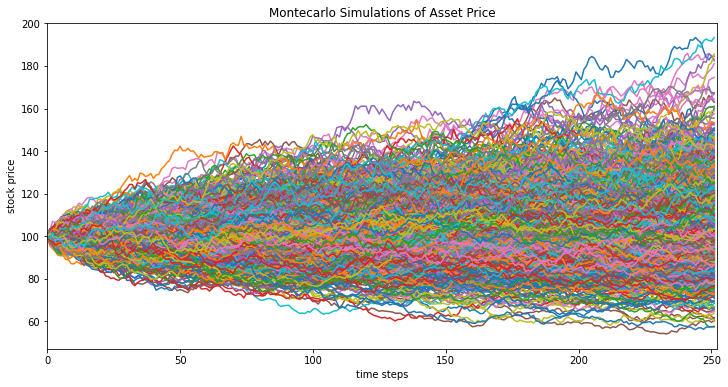

In [268]:
plt.figure(figsize=(12,6))
plt.plot(price_path.iloc[:,:1000])    # plotting the first 1000 simulations
plt.xlabel('time steps')
plt.xlim(0,252)
plt.ylabel('stock price')
plt.title('Montecarlo Simulations of Asset Price')
plt.show()


---

### 2.2 Defining the Asian Option as an Object

In [315]:
class Asian:
    
    def __init__(self, spot, strike, r, dte, volatility, price_path):
        
        self.spot = spot
        
        self.strike = strike
        
        self.r = r
        
        self.dte = dte
        
        self.volatility = volatility
        
        self.price_path = price_path
             
        self.A = price_path.mean()   # calculating arithmetic average for each price path, along the column
        
        
        [self.Asian_Rate_Call , self.Asian_Rate_Put] = self._Asian_Rate  # Defining the methods
        [self.Asian_Strike_Call, self.Asian_Strike_Put] = self._Asian_Strike  # Defining the methods
        
      
         
    @property
    def _Asian_Rate(self):
        '''Returns the price of the rate version of the Asian option: [Rate_Call price, Rate_Put price]'''
        
        rate_call = exp(-self.r*self.dte) * mean(maximum(0, self.A - self.strike))
        rate_put = exp(-self.r*self.dte) * mean(maximum(0, self.strike - self.A))
             
        return [around(rate_call,3),around(rate_put,3)]
    
    @property
    def _Asian_Strike(self):
        '''Returns the price of the strike version of the Asian option: [Strike_Call price, Strike_Put price]'''
        
        
        strike_call = exp(-self.r*self.dte) * mean(maximum(0, self.spot - self.A))
        strike_put = exp(-self.r*self.dte) * mean(maximum(0, self.A - self.spot))
            
        return [around(strike_call,3), around(strike_put,3)]
        

Calculating the price of Asian options given the sample data

In [316]:

option1 = Asian(100, 100, 0.05, 1, 0.2, price_path)

header1 = ['Asian Rate Call', 'Asian Rate Put', 'Asian Strike Call', 'Asian Strike Put']
table1 = [[option1.Asian_Rate_Call, option1.Asian_Rate_Put, option1.Asian_Strike_Call,option1.Asian_Strike_Put]]

print(tabulate(table1, header1))


  Asian Rate Call    Asian Rate Put    Asian Strike Call    Asian Strike Put
-----------------  ----------------  -------------------  ------------------
            5.771             3.344                3.344               5.771


The Asian Rate Call value and the Asian Strike Put value are same only because the spot and strike are equal, if they were different this would yield different values.

---

### 2.3  Defining the Lookback option as an object

In [317]:
class Lookback:
    
    def __init__(self, spot, strike, r, dte, volatility, price_path):
        
        self.spot = spot
        
        self.strike = strike
        
        self.r = r
        
        self.dte = dte
        
        self.volatility = volatility
        
        self.price_path = price_path
             
        self.Max = price_path.max()   # calculating maximum each price path, along the column
        
        self.Min = price_path.min()
        
        
        [self.Lookback_Rate_Call , self.Lookback_Rate_Put] = self._Lookback_Rate  # Defining the methods
        [self.Lookback_Strike_Call, self.Lookback_Strike_Put] = self._Lookback_Strike # Defining the methods 
        
      
         
    @property
    def _Lookback_Rate(self):
        '''Returns the price of the rate version of the Lookback option: [Rate_Call price, Rate_Put price]'''
        
        rate_call = exp(-self.r*self.dte) * mean(maximum(0, self.Max - self.strike))
        rate_put = exp(-self.r*self.dte) * mean(maximum(0, self.strike - self.Min))
             
        return [around(rate_call,3),around(rate_put,3)]
    
    @property
    def _Lookback_Strike(self):
        '''Returns the price of the strike version of the Lookback option: [Strike_Call price, Strike_Put price]'''
        
        
        strike_call = exp(-self.r*self.dte) * mean(maximum(0, self.spot - self.Min))
        strike_put = exp(-self.r*self.dte) * mean(maximum(0, self.Max - self.spot))
            
        return [around(strike_call,3), around(strike_put,3)]
        

Calculating the value of the Lookback Options given the sample data

In [318]:

option2 = Lookback(100, 100, 0.05, 1, 0.2, price_path)

header2 = ['Lookback Rate Call', 'Lookback Rate Put', 'Lookback Strike Call', 'Lookback Strike Put']
table2 = [[option2.Lookback_Rate_Call, option2.Lookback_Rate_Put, option2.Lookback_Strike_Call,option2.Lookback_Strike_Put]]

print(tabulate(table2, header2))


  Lookback Rate Call    Lookback Rate Put    Lookback Strike Call    Lookback Strike Put
--------------------  -------------------  ----------------------  ---------------------
              18.341               11.725                  11.725                 18.341


The lookback rate call value and the lookback strike put values are same as is the case with the other two also, only because the spot = strike. If this were to change the prices would also vary

---

### 2.4 Defining the vanilla option

In [319]:
class Vanilla:
    
    def __init__(self, spot, strike, r, dte, volatility, price_path):
        
        self.spot = spot
        
        self.strike = strike
        
        self.r = r
        
        self.dte = dte
        
        self.volatility = volatility
        
        self.price_path = price_path
                  
        self.Vanilla_Call = self._Vanilla_Call  # Defining the methods
        self.Vanilla_Put = self._Vanilla_Put  # Defining the methods  
    
    @property
    def _Vanilla_Call(self):
        '''Returns the price of the Vanilla Call option '''
        
        vanilla_call = exp(-self.r*self.dte) * mean(maximum(0, self.price_path.iloc[-1] - self.strike))
    
             
        return around(vanilla_call,3)
    
    @property
    def _Vanilla_Put(self):
        '''Returns the price of the Vanilla Put option '''
        
        vanilla_put = exp(-self.r*self.dte) * mean(maximum(0, self.strike - self.price_path.iloc[-1]))
            
        return around(vanilla_put,3)

In [320]:
option3 = Vanilla(100, 100, 0.05, 1, 0.2, price_path)

header3 = ['Vanilla Call', 'Vanilla Put']

table3 = [[option3.Vanilla_Call, option3.Vanilla_Put]]

print(tabulate(table3, header3))

  Vanilla Call    Vanilla Put
--------------  -------------
         10.48          5.574


### 2.5 Combining the outputs of all option values in a table

In [326]:
header4 = ['Option Type', 'Rate Call', 'Rate Put', 'Strike Call', 'Strike Put']

table4 = [['Asian', option1.Asian_Rate_Call, option1.Asian_Rate_Put, option1.Asian_Strike_Call,option1.Asian_Strike_Put],['Lookback',option2.Lookback_Rate_Call, option2.Lookback_Rate_Put, option2.Lookback_Strike_Call,option2.Lookback_Strike_Put],['Vanilla',option3.Vanilla_Call, option3.Vanilla_Put
,'---','---']]

print(tabulate(table4, header4, tablefmt='pretty'))

+-------------+-----------+----------+-------------+------------+
| Option Type | Rate Call | Rate Put | Strike Call | Strike Put |
+-------------+-----------+----------+-------------+------------+
|    Asian    |   5.771   |  3.344   |    3.344    |   5.771    |
|  Lookback   |  18.341   |  11.725  |   11.725    |   18.341   |
|   Vanilla   |   10.48   |  5.574   |     ---     |    ---     |
+-------------+-----------+----------+-------------+------------+


---

### 2.6 Varying inputs

#### Varying the spot

The spot is varied from 50 to 150 (100 sample observations, uniformly spaced). Using a For loop, for each value of the spot, the Monte-carlo simulation is run to generate the price_path. The resultant price path is used to calculate the value of a Asian rate call and Look back rate call, but using the methods corresponding to the objects 'Asian' and 'Lookback'. This loop is run for all the 100 values of the spot, generating a vector of corresponding prices for each spot value. 

'Asian_Rate_Call_S' is a vector that contains the values of the Asian rate calls for all the values of S while 'Lookback_Rate_Call_S' is a vector that contains the values of Lookback rate calls.

In [ ]:
S = linspace(50,150,100)

Asian_Rate_Call_S = []
Lookback_Rate_Call_S = []
Vanilla_Call_S = []


for i in range(len(S)):
    
    price_path = pd.DataFrame(simulate_path(S[i], 0.05, 0.2, 1,252, 100000))
    
    option_asian = Asian(S[i], 100, 0.05, 1, 0.2, price_path)
    
    option_lookback = Lookback(S[i], 100, 0.05, 1, 0.2, price_path)
    
    option_vanilla = Vanilla(S[i], 100, 0.05, 1, 0.2, price_path)
    
    Asian_Rate_Call_S.append(option_asian.Asian_Rate_Call) 
    
    Lookback_Rate_Call_S.append(option_lookback.Lookback_Rate_Call)
    
    Vanilla_Call_S.append(option_vanilla.Vanilla_Call)
    
#S, Asian_Rate_Call_S, Lookback_Rate_Call_S, Vanilla_Call_S
    

In [175]:
size(Asian_Rate_Call_S)

100

#### Visualizing the variation of the option prices with spot values

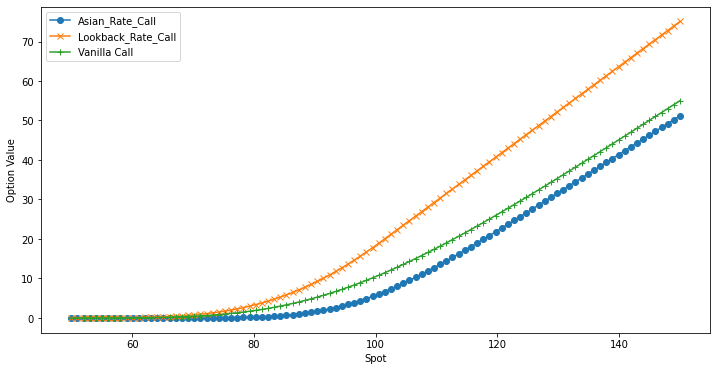

In [248]:
plt.figure(figsize=(12,6))

plt.plot(S, Asian_Rate_Call_S, label='Asian_Rate_Call', marker='o', linestyle='-')

plt.plot(S, Lookback_Rate_Call_S, label='Lookback_Rate_Call', marker='x', linestyle='-')

plt.plot(S, Vanilla_Call_S, label='Vanilla Call', marker = '+', linestyle = '-')

plt.xlabel('Spot')
plt.ylabel('Option Value')
plt.legend()

plt.show()


#### Varying the strike

Same as before , but this time the strike is varied from 50 to 150, to calculate the prices of the Asian Rate Call and the Lookback Rate Call

In [ ]:
E = linspace(50,150,100)

Asian_Rate_Call_E = []
Lookback_Rate_Call_E = []
Vanilla_Call_E = []

price_path = pd.DataFrame(simulate_path(100, 0.05, 0.2, 1,252, 100000))

for i in range(len(E)):  
    
    option_asian = Asian(100, E[i], 0.05, 1, 0.2, price_path)
    
    option_lookback = Lookback(100, E[i], 0.05, 1, 0.2, price_path)
    
    Asian_Rate_Call_E.append(option_asian.Asian_Rate_Call) 
    
    Lookback_Rate_Call_E.append(option_lookback.Lookback_Rate_Call)
    
    option_vanilla = Vanilla(100, E[i], 0.05, 1, 0.2, price_path)
    
    Vanilla_Call_E.append(option_vanilla.Vanilla_Call)
    
E, Asian_Rate_Call_E, Lookback_Rate_Call_E, Vanilla_Call_E

In [233]:
size(Vanilla_Call_E)

100

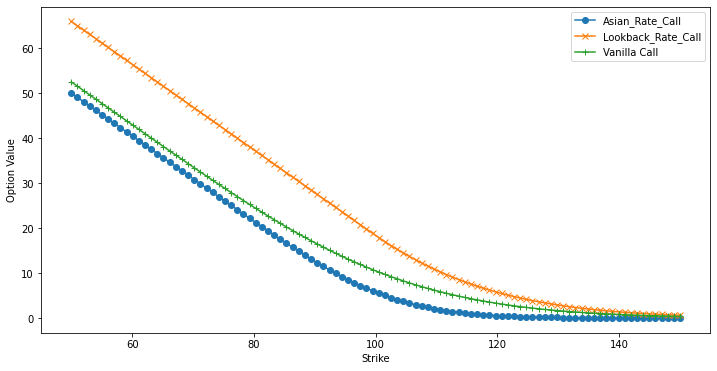

In [236]:
plt.figure(figsize=(12,6))

plt.plot(E, Asian_Rate_Call_E, label='Asian_Rate_Call', marker='o', linestyle='-')

plt.plot(E, Lookback_Rate_Call_E, label='Lookback_Rate_Call', marker='x', linestyle='-')

plt.plot(E, Vanilla_Call_E, label='Vanilla Call', marker = '+', linestyle = '-')

plt.xlabel('Strike')
plt.ylabel('Option Value')
plt.legend()

plt.show()

#### Varying the time to expiry

The time horizon is varied this time from 0 to 1 year, in 24 steps (approximately a fortnight), to generate the corresponding price changes.

In [ ]:
T = linspace(0,1,24)

Asian_Rate_Call_T = []
Lookback_Rate_Call_T = []
Vanilla_Call_T = []


for i in range(len(T)):
    
    price_path = pd.DataFrame(simulate_path(100, 0.05, 0.2, T[i],252, 100000))
    
    option_asian = Asian(100, 100, 0.05, T[i], 0.2, price_path)
    
    option_lookback = Lookback(100, 100, 0.05, T[i], 0.2, price_path)
    
    Asian_Rate_Call_T.append(option_asian.Asian_Rate_Call) 
    
    Lookback_Rate_Call_T.append(option_lookback.Lookback_Rate_Call)
    
    option_vanilla = Vanilla(100, 100, 0.05, T[i], 0.2, price_path)
    
    Vanilla_Call_T.append(option_vanilla.Vanilla_Call)
    
T, Asian_Rate_Call_T, Lookback_Rate_Call_T, Vanilla_Call_T

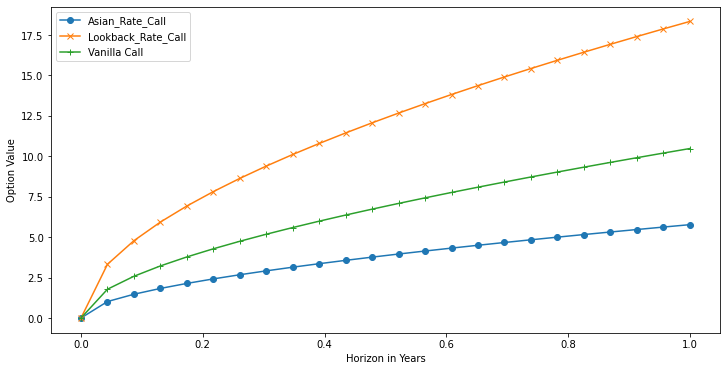

In [237]:
plt.figure(figsize=(12,6))
plt.plot(T, Asian_Rate_Call_T, label='Asian_Rate_Call', marker='o', linestyle='-')

plt.plot(T, Lookback_Rate_Call_T, label='Lookback_Rate_Call', marker='x', linestyle='-')

plt.plot(T, Vanilla_Call_T, label='Vanilla Call', marker = '+', linestyle = '-')

plt.xlabel('Horizon in Years')
plt.ylabel('Option Value')
plt.legend()

plt.show()

#### Varying the interest rate

The risk free rate is varied from -1% to 7% and the corresponding prices are calculated.

In [ ]:
r = linspace(-0.01,0.07,80)

Asian_Rate_Call_r = []
Lookback_Rate_Call_r = []
Vanilla_Call_r = []


for i in range(len(r)):
    
    price_path = pd.DataFrame(simulate_path(100, r[i], 0.2, 1,252, 100000))
    
    option_asian = Asian(100, 100, r[i], 1, 0.2, price_path)
    
    option_lookback = Lookback(100, 100, r[i], 1, 0.2, price_path)
    
    Asian_Rate_Call_r.append(option_asian.Asian_Rate_Call) 
    
    Lookback_Rate_Call_r.append(option_lookback.Lookback_Rate_Call)
    
    option_vanilla = Vanilla(100, 100, r[i], 1, 0.2, price_path)
    
    Vanilla_Call_r.append(option_vanilla.Vanilla_Call)
    
r, Asian_Rate_Call_r, Lookback_Rate_Call_r, Vanilla_Call_r

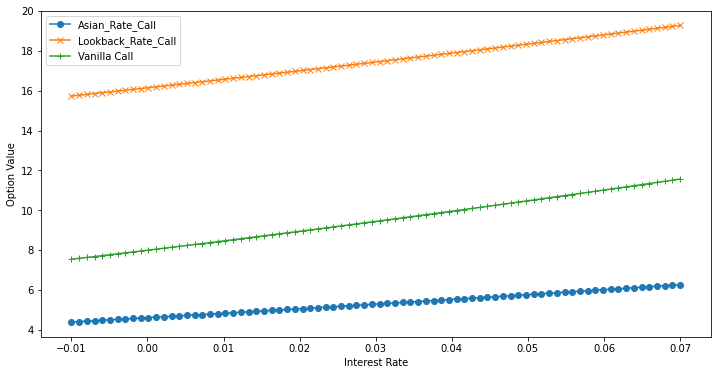

In [239]:
plt.figure(figsize=(12,6))

plt.plot(r, Asian_Rate_Call_r, label='Asian_Rate_Call', marker='o', linestyle='-')

plt.plot(r, Lookback_Rate_Call_r, label='Lookback_Rate_Call', marker='x', linestyle='-')

plt.plot(r, Vanilla_Call_r, label='Vanilla Call', marker = '+', linestyle = '-')

plt.xlabel('Interest Rate')
plt.ylabel('Option Value')
plt.legend()

plt.show()

#### Varying the volatility

The volatility is vaired from 0% to 50% in 50 steps and the corresponding prices are calculated

In [ ]:
vol = linspace(0,0.5,50)

Asian_Rate_Call_vol = []
Lookback_Rate_Call_vol = []
Vanilla_Call_vol = []


for i in range(len(vol)):
    
    price_path = pd.DataFrame(simulate_path(100, 0.05, vol[i], 1,252, 100000))
    
    option_asian = Asian(100, 100, 0.05, 1, vol[i], price_path)
    
    option_lookback = Lookback(100, 100, 0.05, 1, vol[i], price_path)
    
    Asian_Rate_Call_vol.append(option_asian.Asian_Rate_Call) 
    
    Lookback_Rate_Call_vol.append(option_lookback.Lookback_Rate_Call)
    
    option_vanilla = Vanilla(100, 100, 0.05, 1, vol[i], price_path)
    
    Vanilla_Call_vol.append(option_vanilla.Vanilla_Call)
    
vol, Asian_Rate_Call_vol, Lookback_Rate_Call_vol, Vanilla_Call_vol

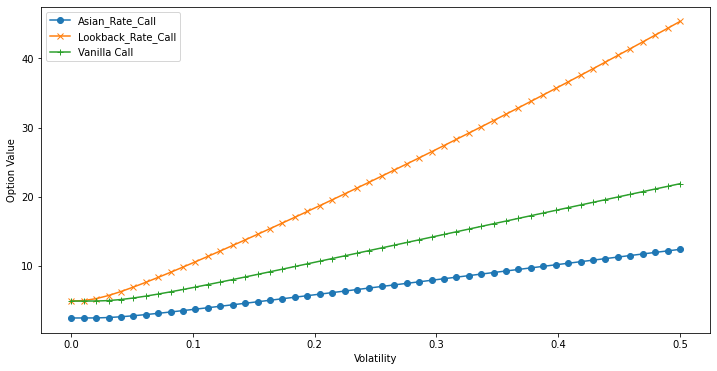

In [241]:
plt.figure(figsize=(12,6))

plt.plot(vol, Asian_Rate_Call_vol, label='Asian_Rate_Call', marker='o', linestyle='-')

plt.plot(vol, Lookback_Rate_Call_vol, label='Lookback_Rate_Call', marker='x', linestyle='-')

plt.plot(vol, Vanilla_Call_vol, label='Vanilla Call', marker = '+', linestyle = '-')

plt.xlabel('Volatility')
plt.ylabel('Option Value')
plt.legend()

plt.show()

---

### 2.7 Plotting all together

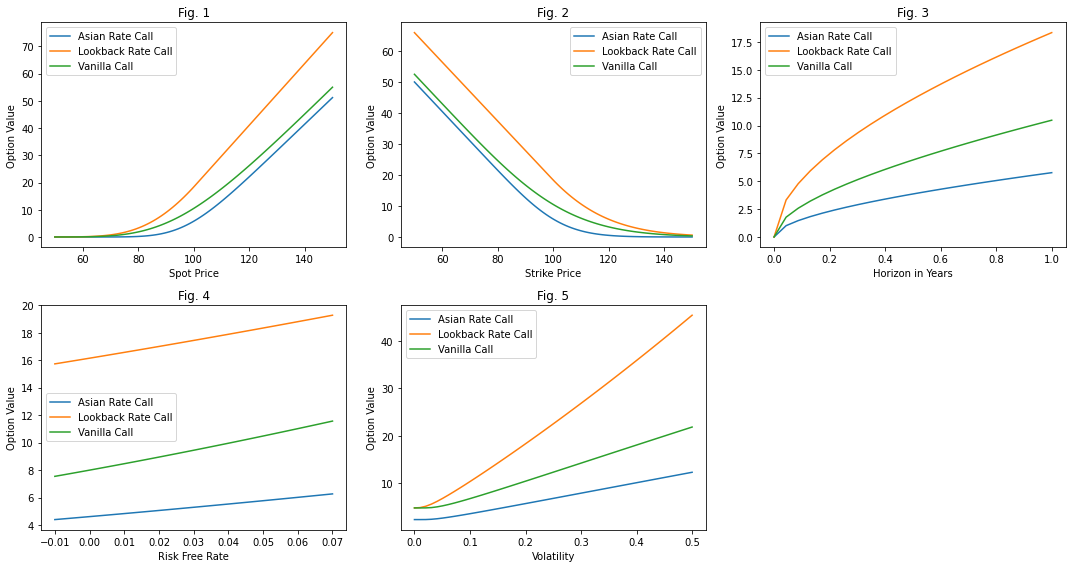

In [259]:

fig, axs = plt.subplots(2, 3, figsize=(15, 8))  # 2 rows, 3 columns of subplots


line1, = axs[0, 0].plot(S, Asian_Rate_Call_S, label='Asian Rate Call')
line2, = axs[0, 0].plot(S, Lookback_Rate_Call_S, label='Lookback Rate Call')
line3, = axs[0, 0].plot(S, Vanilla_Call_S, label='Vanilla Call')
axs[0, 0].set_title('Fig. 1')
axs[0, 0].legend(handles=[line1, line2, line3])
axs[0, 0].set_xlabel('Spot Price')  

line4, = axs[0, 1].plot(E, Asian_Rate_Call_E, label='Asian Rate Call')
line5, = axs[0, 1].plot(E, Lookback_Rate_Call_E, label='Lookback Rate Call')
line6, = axs[0, 1].plot(E, Vanilla_Call_E, label='Vanilla Call')
axs[0, 1].set_title('Fig. 2')
axs[0, 1].legend(handles=[line4, line5, line6])
axs[0, 1].set_xlabel('Strike Price') 

line7, = axs[0, 2].plot(T, Asian_Rate_Call_T, label='Asian Rate Call')
line8, = axs[0, 2].plot(T, Lookback_Rate_Call_T, label='Lookback Rate Call')
line9, = axs[0, 2].plot(T, Vanilla_Call_T, label='Vanilla Call')
axs[0, 2].set_title('Fig. 3')
axs[0, 2].legend(handles=[line7, line8, line9])
axs[0, 2].set_xlabel('Horizon in Years')  

line10, = axs[1, 0].plot(r, Asian_Rate_Call_r, label='Asian Rate Call')
line11, = axs[1, 0].plot(r, Lookback_Rate_Call_r, label='Lookback Rate Call')
line12, = axs[1, 0].plot(r, Vanilla_Call_r, label='Vanilla Call')
axs[1, 0].set_title('Fig. 4')
axs[1, 0].legend(handles=[line10, line11, line12])
axs[1, 0].set_xlabel('Risk Free Rate')  

line13, = axs[1, 1].plot(vol, Asian_Rate_Call_vol, label='Asian Rate Call')
line14, = axs[1, 1].plot(vol, Lookback_Rate_Call_vol, label='Lookback Rate Call')
line15, = axs[1, 1].plot(vol, Vanilla_Call_vol, label='Vanilla Call')
axs[1, 1].set_title('Fig. 5')
axs[1, 1].legend(handles=[line13, line14, line15])
axs[1, 1].set_xlabel('Volatility')  

axs[1, 2].axis('off')

# Common y-axis label
for ax in axs.flat:
    ax.set(ylabel='Option Value')

plt.tight_layout()

plt.show()

---

## 3. Observations and Problems

As can be seen above the vanilla lies between the Lookback and Asian options in the above graphs.

 - The lookback's function i.e. the maximum of the spot over the price path tends to accentuate the payoff and therefore the value.
 - In contrast, the asian option's function used for calculating the payoff i.e. the average, tends to mitigate the payoff and consequently the value.
 - This results in the price of the lookback being higher than the vanilla, which in-turn is higher than the asian option.
 
 When the variations are considered, the remaining paremeters have been left unchanged(ceteris paribus). Looking individually at the variations:
 
 
 - **Variation in spot**:
  - For the variation in the spot, as can be seen from Fig.1 above; when the spot is well below 100 (strike), the call options are deep out of the money and tend to be worthless. As the spot beings to approach 100, the lookback option takes off first , followed by vanilla and finally Asian. This is essentially due to the payoff function.
  
 - **Variation in strike**:
  - Just the oppostite trend is seen here. When strike is very low, the options are deep in the money resulting in high values, but the order remains the same i.e. Lookback > Vanilla > Asian. 
  
 - **Variation in time to expiry**:
  - All option values increase with time to expiry, with the order remaining the same.One point of note is the lookback call is not only higher than the other two but also rises faster than the other two.
  
 - **Variation in Risk Free Rate**:
  - This is one parameters which elicits a linear response. The option values vary linearly with the risk free rate, going up with the rate. 
  
 - **Variation in Volatility**:
  - As expected the option values increase with volatility, with lookback being the highest, followed by Vanilla and the Asian. 
  
  In terms of greeks, the lookback clearly has a much higher delta, theta and vega than the vanilla, which the Asian will be have lower values than the vanilla.


---

## 4. Conclusion

The exotic, path-dependent options viz. Asian and Lookback have been priced using Monte-Carlo simulation. The impact of change in the input values has also been illustrated. 

As expected, the Asian option tends to attenuate the option payoff, in comparison to a vanilla option. This due to the function that the option uses to calculate the payoff. The option was designed to mitigate the impact of extreme events and volatility on the outcome of the option and also tends to have a price lower than the vanilla. This is the attractive feature of the Asian option.

In contrast, the Lookback has been designed to accentuate the payoff from options and ends up being more expensive. It also is more sensitive to changes in underlying price, time to expiry and volatility.

This is reflected in the results. 


---

## 5. References

- Paul Wilmott on Quantative Finance, Volume Two: Asian Options, Lookback Options
- Paul Wilmott on Quantative Finance, Volume Three: Monte Carlo Simulation
- CQF Module 3: Exotic Options
- CQF Python Labs: Monte Carlo Simulation